### Initialization & Reading the Data

We import the necessary libraries and read the csv data into a pandas dataframe.
 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('LendingClub_wi3435TU.csv')

C:\Users\Teo\AppData\Local\Temp\ipykernel_29116\1433089027.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('LendingClub_wi3435TU.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217452 entries, 0 to 217451
Columns: 124 entries, id to settlement_term
dtypes: float64(88), int64(1), object(35)
memory usage: 205.7+ MB


#### Loading the data dictionary
The field descriptions are read in as a Pandas data frame and then extended to a (Pandas) data frame `preview` for a first peek at the data.

In [4]:
pd.set_option('max_colwidth', 1200) # controls output width; might need adjustment
data_dictionary = pd.read_csv('LCDataDictionary.csv') # Loading in the data dictionary
data_dictionary = data_dictionary.rename(columns={'LoanStatNew': 'name', 'Description': 'description'})
data_dictionary.head()

name  \
0        acc_now_delinq   
1  acc_open_past_24mths   
2            addr_state   
3              all_util   
4            annual_inc   

                                                                     description  
0                The number of accounts on which the borrower is now delinquent.  
1                                     Number of trades opened in past 24 months.  
2                     The state provided by the borrower in the loan application  
3                                          Balance to credit limit on all trades  
4  The self-reported annual income provided by the borrower during registration.

In [5]:
df_dtypes = pd.DataFrame(df.dtypes,columns=['dtypes'])
df_dtypes = df_dtypes.reset_index()
df_dtypes['name'] = df_dtypes['index']
df_dtypes = df_dtypes[['name','dtypes']]
df_dtypes['first value'] = df.loc[0].values
preview = df_dtypes.merge(data_dictionary, on='name',how='left')

In [6]:
preview[35:47]

name   dtypes first value  \
35             last_pymnt_amnt  float64     4361.82   
36                next_pymnt_d   object         NaN   
37          last_credit_pull_d   object    Sep-2018   
38  collections_12_mths_ex_med  float64         0.0   
39                 policy_code  float64         1.0   
40            application_type   object  Individual   
41            annual_inc_joint  float64         NaN   
42                   dti_joint  float64         NaN   
43   verification_status_joint   object         NaN   
44              acc_now_delinq  float64         0.0   
45                tot_coll_amt  float64         0.0   
46                 tot_cur_bal  float64     86742.0   

                                                                                                                                                                                                           description  
35                                                                                                                                                                                  Last total payment amount received  
36                                                                                                                                                                                         Next scheduled payment date  
37                                                                                                                                                                The most recent month LC pulled credit for this loan  
38                                                                                                                                                    Number of collections in 12 months excluding medical collections  
39                                                                                                                                 publicly available policy_code=1\nnew products not publicly available policy_code=2  
40                                                                                                                Indicates whether the loan is an individual application or a joint application with two co-borrowers  
41                                                                                                                           The combined self-reported annual income provided by the co-borrowers during registration  
42  A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income  
43                                                                                                                                                                                                                 NaN  
44                                                                                                                                                     The number of accounts on which the borrower is now delinquent.  
45                                                                                                                                                                                  Total collection amounts ever owed  
46                                                                                                                                                                               Total current balance of all accounts

### Features with a lot of missing values

We find the features that have more than 25% of their values missing and drop them.

In [7]:
# We find the features that have more than 25% missing values
missing = pd.DataFrame(df.isnull().sum(),columns=['count'])
missing = missing.reset_index()
missing['name'] = missing['index']
missing = missing[['name','count']]
missing['missing_percentage'] = missing['count']/len(df)
missing = missing[missing['missing_percentage']>0.25]
missing


name   count  missing_percentage
1                                     member_id  217452            1.000000
16                                         desc  217439            0.999940
36                                 next_pymnt_d  146767            0.674940
41                             annual_inc_joint  212991            0.979485
42                                    dti_joint  212992            0.979490
43                    verification_status_joint  212991            0.979485
88                              revol_bal_joint  217452            1.000000
89                       sec_app_fico_range_low  217452            1.000000
90                      sec_app_fico_range_high  217452            1.000000
91                     sec_app_earliest_cr_line  217452            1.000000
92                       sec_app_inq_last_6mths  217452            1.000000
93                             sec_app_mort_acc  217452            1.000000
94                             sec_app_open_acc  217452            1.000000
95                           sec_app_revol_util  217452            1.000000
96                          sec_app_open_act_il  217452            1.000000
97                        sec_app_num_rev_accts  217452            1.000000
98             sec_app_chargeoff_within_12_mths  217452            1.000000
99           sec_app_collections_12_mths_ex_med  217452            1.000000
100         sec_app_mths_since_last_major_derog  217452            1.000000
102                               hardship_type  215161            0.989464
103                             hardship_reason  215161            0.989464
104                             hardship_status  215161            0.989464
105                               deferral_term  215161            0.989464
106                             hardship_amount  215161            0.989464
107                         hardship_start_date  215161            0.989464
108                           hardship_end_date  215161            0.989464
109                     payment_plan_start_date  215161            0.989464
110                             hardship_length  215161            0.989464
111                                hardship_dpd  215161            0.989464
112                        hardship_loan_status  215161            0.989464
113  orig_projected_additional_accrued_interest  215702            0.991952
114              hardship_payoff_balance_amount  215161            0.989464
115                hardship_last_payment_amount  215161            0.989464
118                   debt_settlement_flag_date  211688            0.973493
119                           settlement_status  211688            0.973493
120                             settlement_date  211688            0.973493
121                           settlement_amount  211688            0.973493
122                       settlement_percentage  211688            0.973493
123                             settlement_term  211688            0.973493

In [8]:
# We drop the features that have more than 25% missing values
df = df.drop(missing['name'],axis=1)
df.shape

(217452, 85)

### Filtering on loan status

In [9]:
df['loan_status'].value_counts()

Fully Paid            112409
Current                67079
Charged Off            34358
Late (31-120 days)      2252
In Grace Period          885
Late (16-30 days)        461
Default                    8
Name: loan_status, dtype: int64

In [10]:
# value counts, this time fancy in a Pandas data frame
meaning = [
"Loan has been fully paid off.",
"Loan is up to date on current payments.",
"Loan for which there is no longer a reasonable expectation of further payments.",
"Loan hasn't been paid in 31 to 120 days (late on the current payment).",
"The loan is past due but still in the grace period of 15 days.",
"Loan hasn't been paid in 16 to 30 days (late on the current payment).",
"Loan is defaulted on and no payment has been made for more than 121 days."]
status, count = df["loan_status"].value_counts().index, df["loan_status"].value_counts().values
loan_statuses_explanation = pd.DataFrame({'Loan Status': status,'Count': count,'Meaning': meaning})[['Loan Status','Count','Meaning']]
loan_statuses_explanation

Loan Status   Count  \
0          Fully Paid  112409   
1             Current   67079   
2         Charged Off   34358   
3  Late (31-120 days)    2252   
4     In Grace Period     885   
5   Late (16-30 days)     461   
6             Default       8   

                                                                           Meaning  
0                                                    Loan has been fully paid off.  
1                                          Loan is up to date on current payments.  
2  Loan for which there is no longer a reasonable expectation of further payments.  
3           Loan hasn't been paid in 31 to 120 days (late on the current payment).  
4                   The loan is past due but still in the grace period of 15 days.  
5            Loan hasn't been paid in 16 to 30 days (late on the current payment).  
6        Loan is defaulted on and no payment has been made for more than 121 days.

Since we don't want our model to make predictions based on loans that are still running, we will drop from the dataset all loans that are not in the final status.

In [11]:
df = df[~df['loan_status'].isin(['Current', 'Charged Off', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)'])]

df['loan_status'] = df['loan_status'].map({'Fully Paid': 1, 'Default': 0, 'Charged Off' : 0})

df.shape

(112417, 85)

In [12]:
df.head()

id  loan_amnt        term  int_rate  installment grade sub_grade  \
0  92807938     7200.0   36 months     11.49       237.40     B        B5   
1  70905785    16800.0   36 months     17.27       601.23     D        D2   
2  76394482     8000.0   36 months      6.49       245.16     A        A2   
4  70876608    11975.0   36 months      7.39       371.90     A        A4   
5  71726515    13000.0   36 months      9.75       417.95     B        B3   

                       emp_title emp_length home_ownership  ...  \
0  Health Information Specialist    7 years           RENT  ...   
1           Correctional Officer    5 years           RENT  ...   
2                      carpenter  10+ years       MORTGAGE  ...   
4             Operations Manager   < 1 year           RENT  ...   
5           Admissions Recruiter    4 years           RENT  ...   

   pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies  tax_liens  \
0            96.9             33.3                  0.0        0.0   
1            77.8              0.0                  0.0        0.0   
2           100.0             50.0                  0.0        0.0   
4            96.2             50.0                  0.0        0.0   
5            92.3             14.3                  0.0        0.0   

  tot_hi_cred_lim total_bal_ex_mort total_bc_limit hardship_flag  \
0         95478.0           86742.0        10500.0             N   
1         59929.0           40369.0         6800.0             N   
2        225278.0           25123.0        11100.0             N   
4         57400.0           24799.0        56800.0             N   
5         65833.0           20043.0        38000.0             N   

  disbursement_method  debt_settlement_flag  
0                Cash                     N  
1                Cash                     N  
2                Cash                     N  
4                Cash                     N  
5                Cash                     N  

[5 rows x 85 columns]

### Preventing data leakage


In [13]:
drop_list1 = []
df.drop(drop_list1, axis=1, inplace=True)

### Dropping features of no/little predictive value


In [14]:
drop_list2 = [
    'id',
    'policy_code',
    'url'
]
df.drop(drop_list2, axis=1, inplace=True)

In [15]:
df.head()

loan_amnt        term  int_rate  installment grade sub_grade  \
0     7200.0   36 months     11.49       237.40     B        B5   
1    16800.0   36 months     17.27       601.23     D        D2   
2     8000.0   36 months      6.49       245.16     A        A2   
4    11975.0   36 months      7.39       371.90     A        A4   
5    13000.0   36 months      9.75       417.95     B        B3   

                       emp_title emp_length home_ownership  annual_inc  ...  \
0  Health Information Specialist    7 years           RENT     51104.0  ...   
1           Correctional Officer    5 years           RENT     42000.0  ...   
2                      carpenter  10+ years       MORTGAGE     42000.0  ...   
4             Operations Manager   < 1 year           RENT     60000.0  ...   
5           Admissions Recruiter    4 years           RENT     37200.0  ...   

  pct_tl_nvr_dlq percent_bc_gt_75  pub_rec_bankruptcies tax_liens  \
0           96.9             33.3                   0.0       0.0   
1           77.8              0.0                   0.0       0.0   
2          100.0             50.0                   0.0       0.0   
4           96.2             50.0                   0.0       0.0   
5           92.3             14.3                   0.0       0.0   

  tot_hi_cred_lim total_bal_ex_mort total_bc_limit  hardship_flag  \
0         95478.0           86742.0        10500.0              N   
1         59929.0           40369.0         6800.0              N   
2        225278.0           25123.0        11100.0              N   
4         57400.0           24799.0        56800.0              N   
5         65833.0           20043.0        38000.0              N   

   disbursement_method debt_settlement_flag  
0                 Cash                    N  
1                 Cash                    N  
2                 Cash                    N  
4                 Cash                    N  
5                 Cash                    N  

[5 rows x 82 columns]

### Dropping unbalanced features

We drop the features that have an unbalanced distribution of values. By unbalanced we mean that one of the values is present in more than 95% of the observations.


In [16]:
percentage = 95

for col in df.columns:
    values = df[col].value_counts()
    values = values / values.sum() * 100
    for value in values:
        if value >= percentage:
            df.drop(col, axis=1, inplace=True)
            break



In [17]:
df.head()

loan_amnt        term  int_rate  installment grade sub_grade  \
0     7200.0   36 months     11.49       237.40     B        B5   
1    16800.0   36 months     17.27       601.23     D        D2   
2     8000.0   36 months      6.49       245.16     A        A2   
4    11975.0   36 months      7.39       371.90     A        A4   
5    13000.0   36 months      9.75       417.95     B        B3   

                       emp_title emp_length home_ownership  annual_inc  ...  \
0  Health Information Specialist    7 years           RENT     51104.0  ...   
1           Correctional Officer    5 years           RENT     42000.0  ...   
2                      carpenter  10+ years       MORTGAGE     42000.0  ...   
4             Operations Manager   < 1 year           RENT     60000.0  ...   
5           Admissions Recruiter    4 years           RENT     37200.0  ...   

  num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats pct_tl_nvr_dlq  \
0           8.0          12.0                 3.0     17.0           96.9   
1           4.0           5.0                 3.0     14.0           77.8   
2           2.0           3.0                 2.0      4.0          100.0   
4           8.0          17.0                 6.0      8.0           96.2   
5          10.0          12.0                 4.0     11.0           92.3   

  percent_bc_gt_75  pub_rec_bankruptcies  tot_hi_cred_lim total_bal_ex_mort  \
0             33.3                   0.0          95478.0           86742.0   
1              0.0                   0.0          59929.0           40369.0   
2             50.0                   0.0         225278.0           25123.0   
4             50.0                   0.0          57400.0           24799.0   
5             14.3                   0.0          65833.0           20043.0   

   total_bc_limit  
0         10500.0  
1          6800.0  
2         11100.0  
4         56800.0  
5         38000.0  

[5 rows x 72 columns]

### Dropping highly correlated features

We try to find correlations between the features and drop the ones that are highly correlated (correlation coefficient >= 0.7).

In [18]:
percentage = 0.7

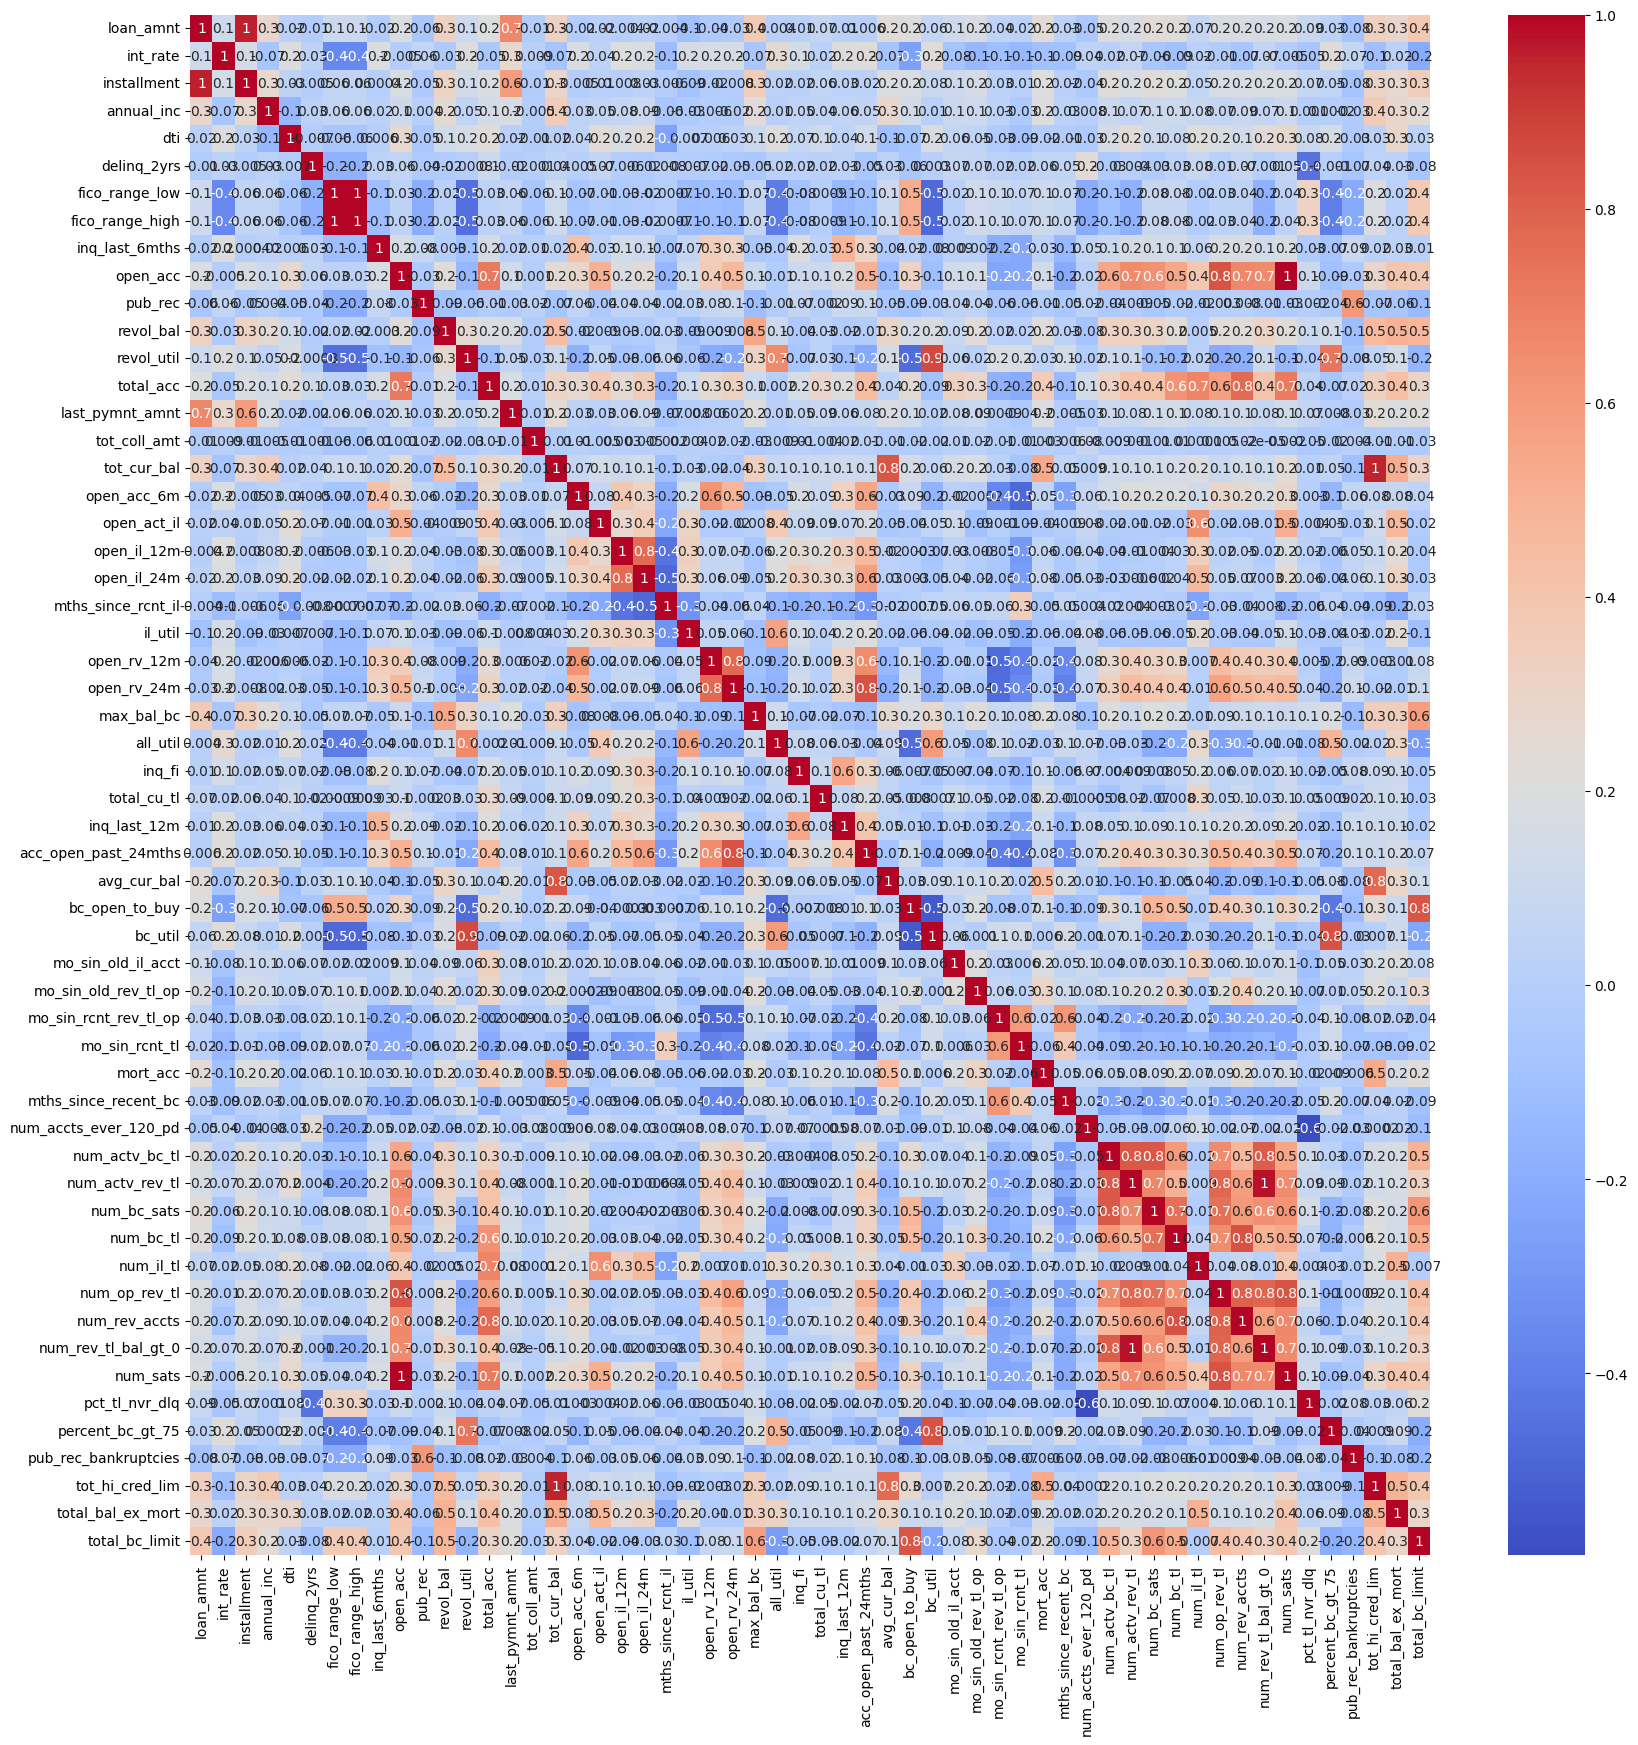

In [26]:
corr = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt='.1g', cmap='coolwarm')
plt.show()


Since the correlation matrix was generated only from the numeric features, we also need to investigate the correlation of the categorical features.

In [27]:
dfcorr = df.copy(deep=True)

nonnumeric_columns = dfcorr.select_dtypes(exclude=[np.number]).columns

for col in nonnumeric_columns:
    dfcorr[col] = dfcorr[col].astype('category').cat.codes

In [28]:
df.head()

loan_amnt        term  int_rate  installment grade sub_grade  \
0     7200.0   36 months     11.49       237.40     B        B5   
1    16800.0   36 months     17.27       601.23     D        D2   
2     8000.0   36 months      6.49       245.16     A        A2   
4    11975.0   36 months      7.39       371.90     A        A4   
5    13000.0   36 months      9.75       417.95     B        B3   

                       emp_title emp_length home_ownership  annual_inc  ...  \
0  Health Information Specialist    7 years           RENT     51104.0  ...   
1           Correctional Officer    5 years           RENT     42000.0  ...   
2                      carpenter  10+ years       MORTGAGE     42000.0  ...   
4             Operations Manager   < 1 year           RENT     60000.0  ...   
5           Admissions Recruiter    4 years           RENT     37200.0  ...   

  num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats pct_tl_nvr_dlq  \
0           8.0          12.0                 3.0     17.0           96.9   
1           4.0           5.0                 3.0     14.0           77.8   
2           2.0           3.0                 2.0      4.0          100.0   
4           8.0          17.0                 6.0      8.0           96.2   
5          10.0          12.0                 4.0     11.0           92.3   

  percent_bc_gt_75  pub_rec_bankruptcies  tot_hi_cred_lim total_bal_ex_mort  \
0             33.3                   0.0          95478.0           86742.0   
1              0.0                   0.0          59929.0           40369.0   
2             50.0                   0.0         225278.0           25123.0   
4             50.0                   0.0          57400.0           24799.0   
5             14.3                   0.0          65833.0           20043.0   

   total_bc_limit  
0         10500.0  
1          6800.0  
2         11100.0  
4         56800.0  
5         38000.0  

[5 rows x 72 columns]

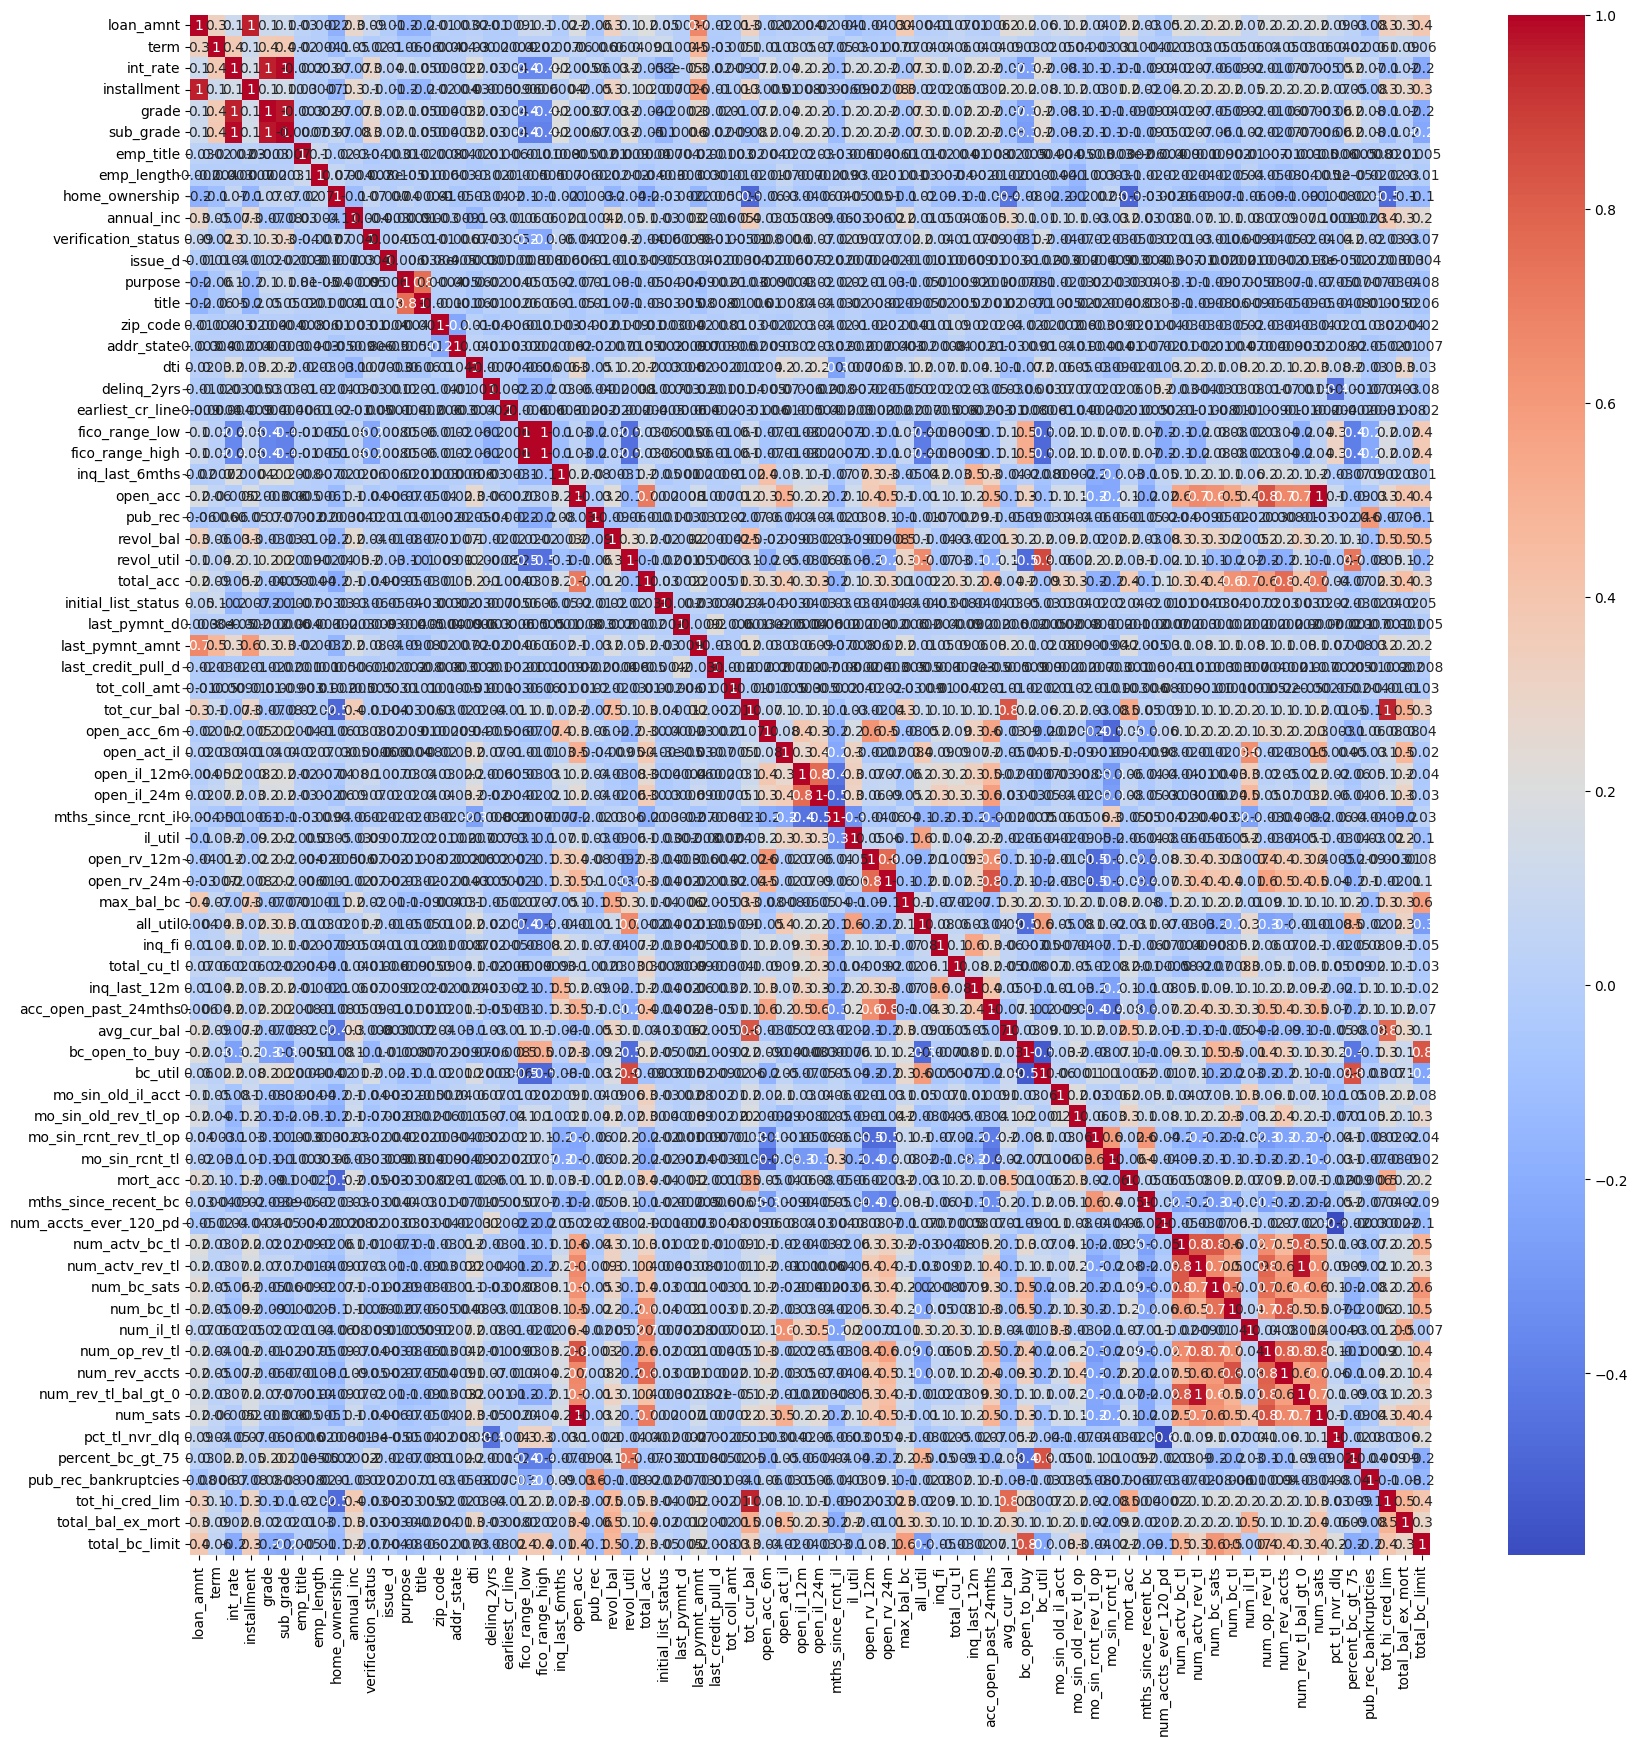

In [29]:
corr = dfcorr.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt='.1g', cmap='coolwarm')
plt.show()

We will remove all the features that are highly correlated.

In [37]:
rows, cols = dfcorr.shape
flds = list(dfcorr.columns)
cors = dfcorr.corr().values

pairs = []

for i in range(cols):
    for j in range(i+1, cols):
        if cors[i,j] > 0.7 or cors[i,j] < -0.7:
            pair = (flds[i], flds[j], cors[i,j])
            pairs.append(pair)
            print(pair)

# get all the unique strings from pairs
unique = []
for pair in pairs:
    unique.append(pair[0])
    unique.append(pair[1])
unique = list(set(unique))

print(len(unique))

('loan_amnt', 'installment', 0.9619171308390119)
('int_rate', 'grade', 0.9625693626562462)
('int_rate', 'sub_grade', 0.9888842288740333)
('grade', 'sub_grade', 0.9705749973911887)
('purpose', 'title', 0.7531371792244432)
('fico_range_low', 'fico_range_high', 0.9999998899088377)
('open_acc', 'total_acc', 0.71773259649481)
('open_acc', 'num_op_rev_tl', 0.8382605877818587)
('open_acc', 'num_sats', 0.998720494073575)
('revol_util', 'bc_util', 0.8647735900806611)
('revol_util', 'percent_bc_gt_75', 0.7315186826454417)
('total_acc', 'num_rev_accts', 0.7654281150908526)
('total_acc', 'num_sats', 0.7142659422951485)
('tot_cur_bal', 'avg_cur_bal', 0.8303477341130965)
('tot_cur_bal', 'tot_hi_cred_lim', 0.9533438426488706)
('open_il_12m', 'open_il_24m', 0.765138572840107)
('open_rv_12m', 'open_rv_24m', 0.7737705877124873)
('open_rv_24m', 'acc_open_past_24mths', 0.8393339381237377)
('avg_cur_bal', 'tot_hi_cred_lim', 0.7733473623067936)
('bc_open_to_buy', 'total_bc_limit', 0.8318082353708969)
('bc_u

#### Variant A - Removing both features if there's a high correlation between them

In [52]:
# create a copy of the dataframe with the unique strings dropped
dfA = df.copy(deep=True)
dfA.drop(unique, axis=1, inplace=True)

dfA.head()


loan_amnt        term  int_rate  installment grade  \
0     7200.0   36 months     11.49       237.40     B   
1    16800.0   36 months     17.27       601.23     D   
2     8000.0   36 months      6.49       245.16     A   
4    11975.0   36 months      7.39       371.90     A   
5    13000.0   36 months      9.75       417.95     B   

                       emp_title emp_length home_ownership  annual_inc  \
0  Health Information Specialist    7 years           RENT     51104.0   
1           Correctional Officer    5 years           RENT     42000.0   
2                      carpenter  10+ years       MORTGAGE     42000.0   
4             Operations Manager   < 1 year           RENT     60000.0   
5           Admissions Recruiter    4 years           RENT     37200.0   

  verification_status  ... num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0  \
0        Not Verified  ...           8.0          12.0                 3.0   
1            Verified  ...           4.0           5.0                 3.0   
2        Not Verified  ...           2.0           3.0                 2.0   
4     Source Verified  ...           8.0          17.0                 6.0   
5        Not Verified  ...          10.0          12.0                 4.0   

  num_sats pct_tl_nvr_dlq  percent_bc_gt_75  pub_rec_bankruptcies  \
0     17.0           96.9              33.3                   0.0   
1     14.0           77.8               0.0                   0.0   
2      4.0          100.0              50.0                   0.0   
4      8.0           96.2              50.0                   0.0   
5     11.0           92.3              14.3                   0.0   

  tot_hi_cred_lim  total_bal_ex_mort  total_bc_limit  
0         95478.0            86742.0         10500.0  
1         59929.0            40369.0          6800.0  
2        225278.0            25123.0         11100.0  
4         57400.0            24799.0         56800.0  
5         65833.0            20043.0         38000.0  

[5 rows x 71 columns]

#### Variant B - Removing only one feature if there are high correlations

In [53]:
drop_list = []
for elem in pairs:
    A, B, C = elem
    if A not in drop_list and B not in drop_list:
        drop_list.append(A)

print(len(drop_list))
print(drop_list)

20
['loan_amnt', 'int_rate', 'grade', 'purpose', 'fico_range_low', 'open_acc', 'revol_util', 'total_acc', 'tot_cur_bal', 'open_il_12m', 'open_rv_12m', 'open_rv_24m', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_op_rev_tl']


In [51]:
dfB = df.copy(deep=True)
dfB.drop(drop_list, axis=1, inplace=True)

dfB.head()

term  installment sub_grade                      emp_title  \
0   36 months       237.40        B5  Health Information Specialist   
1   36 months       601.23        D2           Correctional Officer   
2   36 months       245.16        A2                      carpenter   
4   36 months       371.90        A4             Operations Manager   
5   36 months       417.95        B3           Admissions Recruiter   

  emp_length home_ownership  annual_inc verification_status   issue_d  \
0    7 years           RENT     51104.0        Not Verified  Dec-2016   
1    5 years           RENT     42000.0            Verified  Feb-2016   
2  10+ years       MORTGAGE     42000.0        Not Verified  Apr-2016   
4   < 1 year           RENT     60000.0     Source Verified  Feb-2016   
5    4 years           RENT     37200.0        Not Verified  Mar-2016   

                     title  ... num_il_tl num_rev_accts  num_rev_tl_bal_gt_0  \
0       Debt consolidation  ...      20.0          12.0                  3.0   
1       Debt consolidation  ...      13.0           5.0                  3.0   
2  Credit card refinancing  ...       5.0           3.0                  2.0   
4       Debt consolidation  ...       9.0          17.0                  6.0   
5  Credit card refinancing  ...       1.0          12.0                  4.0   

   num_sats pct_tl_nvr_dlq  percent_bc_gt_75  pub_rec_bankruptcies  \
0      17.0           96.9              33.3                   0.0   
1      14.0           77.8               0.0                   0.0   
2       4.0          100.0              50.0                   0.0   
4       8.0           96.2              50.0                   0.0   
5      11.0           92.3              14.3                   0.0   

   tot_hi_cred_lim  total_bal_ex_mort total_bc_limit  
0          95478.0            86742.0        10500.0  
1          59929.0            40369.0         6800.0  
2         225278.0            25123.0        11100.0  
4          57400.0            24799.0        56800.0  
5          65833.0            20043.0        38000.0  

[5 rows x 52 columns]